# Summary

All strategies:
  - Strategy 1: Correlation to one asset based on returns, one period behind, train up to 2024-01-01, correlation for all assets, fixed correlation in test period to calculate weights
  - Strategy 2: Like strategy 1 except with correlation based on prices
  - Strategy 3: Rolling correlation of returns based on last N periods, dynamically selected at each time step
  - Strategy 4: Rolling correlation of prices based on last N periods, dynamically selected at each time step
  - Strategy 5: Correlation to one asset based on returns, one period behind, trained up to 2024-01-01, correlation for only assets with correlation above threshold x
  - Strategy 6: Correlation to one asset based on prices, one period behind, trained up to 2024-01-01, correlation for only assets with correlation above threshold x
  - Strategy 7: Correlation to one asset based on returns, one period behind, train up to 2024-01-01, correlation for all assets, dynamic trailing correlation in test period to calculate weights

# Get Historical Data For Cryptocurrencies

In [1]:
from binance.client import Client as bnb_client
from datetime import datetime
import pandas as pd

# The universe is based on this snapshot from December 20, 2020: https://coinmarketcap.com/historical/20201220/

univ = [
    "BTCUSDT", "ETHUSDT", "ADAUSDT", "BNBUSDT", "XRPUSDT", "DOTUSDT", "MATICUSDT", "LTCUSDT", "BCHUSDT",
    "LINKUSDT", "XLMUSDT", "USDCUSDT", "EOSUSDT", "TRXUSDT", "XTZUSDT", "FILUSDT", "NEOUSDT", "DAIUSDT",
    "DASHUSDT", "VETUSDT", "ATOMUSDT", "AAVEUSDT", "UNIUSDT", "GRTUSDT", "THETAUSDT", "IOTAUSDT", "BUSDUSDT",
    "ZECUSDT", "YFIUSDT", "ETCUSDT", "WAVESUSDT", "COMPUSDT", "SNXUSDT", "DOGEUSDT", "MKRUSDT", "ZILUSDT",
    "SUSHIUSDT", "KSMUSDT", "OMGUSDT", "ONTUSDT", "ALGOUSDT", "EGLDUSDT", "BATUSDT", "DGBUSDT", "ZRXUSDT",
    "TUSDUSDT", "QTUMUSDT", "ICXUSDT", "AVAXUSDT", "RENUSDT", "HBARUSDT", "NEARUSDT", "LRCUSDT", "CELOUSDT",
    "KNCUSDT", "LSKUSDT", "OCEANUSDT", "QNTUSDT", "USTUSDT", "BANDUSDT", "MANAUSDT", "ENJUSDT", "ANTUSDT",
    "BNTUSDT", "ZENUSDT", "NMRUSDT", "RVNUSDT", "IOSTUSDT", "OXTUSDT", "CRVUSDT", "MATICUSDT", "HNTUSDT",
    "BALUSDT", "CHZUSDT"
]

should_download_stock_data = False

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
client = bnb_client(tld='US')


def get_binance_px(symbol, freq, start_ts = '2020-12-20'):
    data = client.get_historical_klines(symbol, freq, start_ts)
    columns = ['open_time', 'open', 'high', 'low', 'close', 'volume', 'close_time', 'quote_volume',
               'num_trades', 'taker_base_volume', 'taker_quote_volume', 'ignore']
    data = pd.DataFrame(data, columns = columns)
    
    # Convert from POSIX timestamp (number of millisecond since jan 1, 1970)
    data['open_time'] = data['open_time'].map(lambda x: datetime.utcfromtimestamp(x/1000))
    data['close_time'] = data['close_time'].map(lambda x: datetime.utcfromtimestamp(x/1000))
    return data 


if should_download_stock_data:
    freq = '4h'
    px = {}
    for x in univ:
        print(f"Downloading data for symbol {x}")
        data = get_binance_px(x, freq)
        px[x] = data.set_index('open_time')['close']

    px = pd.DataFrame(px).astype(float)
    px.to_csv('./class_project_input_prices.csv')
else:
    px = pd.read_csv('./class_project_input_prices.csv')
    date_format = "%Y-%m-%d %H:%M:%S"
    px['open_time'] = px['open_time'].apply(lambda t:  datetime.strptime(t, date_format))
    px.set_index('open_time', inplace=True)

# Data up to 2025-08-31 08:00:00
px

,BTCUSDT,ETHUSDT,ADAUSDT,BNBUSDT,XRPUSDT,DOTUSDT,MATICUSDT,LTCUSDT,BCHUSDT,LINKUSDT,...,BNTUSDT,ZENUSDT,NMRUSDT,RVNUSDT,IOSTUSDT,OXTUSDT,CRVUSDT,HNTUSDT,BALUSDT,CHZUSDT
open_time,,,,,,,,,,,,,,,,,,,,,
2020-12-20 00:00:00,23353.97,646.62,0.16284,32.9681,0.56944,NaN,NaN,117.34,313.46,NaN,...,NaN,12.056,NaN,NaN,NaN,0.2492,NaN,1.41095,NaN,NaN
2020-12-20 04:00:00,23604.24,655.23,0.16638,33.6559,0.57916,NaN,NaN,121.30,340.00,NaN,...,NaN,12.107,NaN,NaN,NaN,0.2477,NaN,1.43156,NaN,NaN
2020-12-20 08:00:00,23549.50,652.88,0.16463,34.8228,0.57948,NaN,NaN,118.09,349.70,NaN,...,NaN,12.237,NaN,NaN,NaN,0.2477,NaN,1.44273,NaN,NaN
2020-12-20 12:00:00,23880.85,653.24,0.16542,35.0120,0.57798,NaN,NaN,119.10,361.21,NaN,...,NaN,12.074,NaN,NaN,NaN,0.2533,NaN,1.47130,NaN,NaN
2020-12-20 16:00:00,23932.71,649.82,0.16502,34.7042,0.57306,NaN,NaN,116.60,357.09,NaN,...,NaN,12.008,NaN,NaN,NaN,0.2503,NaN,1.43083,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-08-30 16:00:00,108921.64,4352.10,0.81950,856.7600,2.80720,3.816,NaN,110.23,542.00,23.36,...,0.725,7.240,16.62,0.01323,0.00342,0.0535,0.7646,NaN,NaN,0.03830
2025-08-30 20:00:00,108569.75,4374.56,0.82170,862.6200,2.81940,3.773,NaN,110.77,552.90,23.47,...,0.725,7.240,15.16,0.01323,0.00342,0.0535,0.7646,NaN,NaN,0.03830
2025-08-31 00:00:00,109155.73,4486.79,0.83590,863.4900,2.85180,3.867,NaN,111.67,551.30,23.90,...,0.764,7.240,15.21,0.01353,0.00342,0.0535,0.7936,NaN,NaN,0.04045


# Utility Functions

In [3]:
def calculate_covariance_directly(ser_1, ser_2):
    available_1 = ser_1.notna()
    available_2 = ser_2.notna()
    
    common_1 = ser_1[available_1][available_2]
    common_2 = ser_2[available_1][available_2]
    
    mean_1 = common_1.mean()
    demeaned_1 = common_1 - mean_1
    
    mean_2 = common_2.mean()
    demeaned_2 = common_2 - mean_2
    
    return (demeaned_1 * demeaned_2).sum() / (demeaned_1.shape[0] - 1)

# Using pd.corrwith() yields a large number of hardware-related warnings so I implemented by own version.
def calculate_correlation_directly(ser_1, ser_2):
    cov = calculate_covariance_directly(ser_1, ser_2)

    available_1 = ser_1.notna()
    available_2 = ser_2.notna()
    
    common_1 = ser_1[available_1][available_2]
    common_2 = ser_2[available_1][available_2]
    
    return cov / (common_1.std() * common_2.std())


# time_point must be in the index of df
def get_train_test_data(df, time_point):
    train_data = df.loc[:time_point].iloc[:-1]
    test_data = df.loc[time_point:]
    return train_data, test_data

# Strategy 1: Correlation to one asset based on returns, one period behind, train up to 2024-01-01, correlation for all assets, fixed correlation in test period to calculate weights

In [5]:
from datetime import datetime

ret = px / px.shift() - 1

t = datetime(2024, 1, 1, 0, 0)
train_data, test_data = get_train_test_data(ret, t)

coins_to_top_corr_coins_by_ret = dict()

for col in train_data.columns:
    corr_with_coin = ret.shift().apply(lambda coin_col: calculate_correlation_directly(coin_col, ret[col]))
    
    sorted_corr_with_coin = corr_with_coin.sort_values()
    non_coin_corr = sorted_corr_with_coin[sorted_corr_with_coin.index != col]
    #train_data.iloc[-10:]

    coins_not_ending_null = non_coin_corr[train_data.iloc[-10:].notna().any()]
    coins_to_top_corr_coins_by_ret[col] = coins_not_ending_null[
        coins_not_ending_null.abs() >= coins_not_ending_null.abs().max()].index[0]


coins_to_top_corr_coins_by_ret
# test_data
# ret.loc[]

# corr_with_BTC = ret.shift().apply(lambda coin_col: calculate_correlation_directly(coin_col, ret['BTCUSDT']))

{'BTCUSDT': 'TUSDUSDT',
 'ETHUSDT': 'TUSDUSDT',
 'ADAUSDT': 'TUSDUSDT',
 'BNBUSDT': 'TUSDUSDT',
 'XRPUSDT': 'LTCUSDT',
 'DOTUSDT': 'TUSDUSDT',
 'MATICUSDT': 'TUSDUSDT',
 'LTCUSDT': 'TUSDUSDT',
 'BCHUSDT': 'TUSDUSDT',
 'LINKUSDT': 'TUSDUSDT',
 'XLMUSDT': 'TUSDUSDT',
 'USDCUSDT': 'BNTUSDT',
 'EOSUSDT': 'VETUSDT',
 'TRXUSDT': 'NMRUSDT',
 'XTZUSDT': 'ADAUSDT',
 'FILUSDT': 'MATICUSDT',
 'NEOUSDT': 'TUSDUSDT',
 'DAIUSDT': 'IOTAUSDT',
 'DASHUSDT': 'LTCUSDT',
 'VETUSDT': 'TUSDUSDT',
 'ATOMUSDT': 'TUSDUSDT',
 'AAVEUSDT': 'TUSDUSDT',
 'UNIUSDT': 'TUSDUSDT',
 'GRTUSDT': 'TUSDUSDT',
 'THETAUSDT': 'TUSDUSDT',
 'IOTAUSDT': 'ICXUSDT',
 'BUSDUSDT': 'TUSDUSDT',
 'ZECUSDT': 'LINKUSDT',
 'YFIUSDT': 'TUSDUSDT',
 'ETCUSDT': 'TUSDUSDT',
 'WAVESUSDT': 'DASHUSDT',
 'COMPUSDT': 'TUSDUSDT',
 'SNXUSDT': 'IOTAUSDT',
 'DOGEUSDT': 'TUSDUSDT',
 'MKRUSDT': 'NEOUSDT',
 'ZILUSDT': 'DAIUSDT',
 'SUSHIUSDT': 'TUSDUSDT',
 'KSMUSDT': 'TUSDUSDT',
 'OMGUSDT': 'TUSDUSDT',
 'ONTUSDT': 'DOTUSDT',
 'ALGOUSDT': 'TUSDUSDT',
 'EGLDU

In [6]:
import numpy as np
import time

# test_coins = ['BTCUSDT', 'ETHUSDT', 'ADAUSDT', 'BNBUSDT', 'XRPUSDT']
coins_to_look_back_reg_params = dict()

for coin in train_data.columns:
    #print(coin)
    corr_coin = coins_to_top_corr_coins_by_ret[coin]

    #px_train_data, px_test_data = get_train_test_data(px, t)

    # px_train_data[corr_coin].iloc[-40:]

    # train_data['BTCUSDT'] ~ train_data[corr_coin].shift()
    # print(corr_coin)

    beta = calculate_covariance_directly(train_data[coin], train_data[corr_coin].shift()) / train_data[corr_coin].shift().var()
    #print(beta)

    val_input = train_data[corr_coin].shift().notna()
    val_output = train_data[coin].notna()

    inputs = train_data[corr_coin].shift()[val_input & val_output]
    outputs = train_data[coin][val_input & val_output]

    alpha = outputs.mean() - beta * inputs.mean()
    #print(alpha)
    #print()

    # beta = np.cov(train_data['BTCUSDT'], train_data[corr_coin].shift())
    # beta
    
    coins_to_look_back_reg_params[coin] = {"alpha": alpha, "beta": beta}

coins_to_look_back_reg_params

{'BTCUSDT': {'alpha': 0.00032634177424630944, 'beta': -0.0035411421574114196},
 'ETHUSDT': {'alpha': 0.00022467484689206308, 'beta': -0.006834670475811199},
 'ADAUSDT': {'alpha': 0.00031328204793650997, 'beta': -0.01743357587617104},
 'BNBUSDT': {'alpha': 0.00011463225520871146, 'beta': -0.007767833602626233},
 'XRPUSDT': {'alpha': -0.0005031555390706605, 'beta': -0.11902954700528769},
 'DOTUSDT': {'alpha': 0.0002336698471570782, 'beta': -0.013268404021179871},
 'MATICUSDT': {'alpha': 0.00021421141283802571, 'beta': -0.017367941526578716},
 'LTCUSDT': {'alpha': 0.00025477015150428435, 'beta': -0.012720806560444815},
 'BCHUSDT': {'alpha': 0.0004663773283381559, 'beta': -0.007928018150350453},
 'LINKUSDT': {'alpha': 0.0004627785244612418, 'beta': -0.015059882621259721},
 'XLMUSDT': {'alpha': 0.00021035020077824927, 'beta': -0.009522371497124342},
 'USDCUSDT': {'alpha': 1.1472411158517709e-05, 'beta': -0.006253906896570045},
 'EOSUSDT': {'alpha': -2.1871731229706967e-05, 'beta': 0.0413009

In [7]:
# import statsmodels.api as sm

# test_coins = ['BTCUSDT', 'ETHUSDT', 'ADAUSDT', 'BNBUSDT', 'XRPUSDT']

# for coin in test_coins:
#     corr_coin = coins_to_top_corr_coins_by_ret[coin]
#     inputs = train_data[corr_coin].shift()
#     outputs = train_data[coin]

#     val_inputs = inputs.notna()
#     val_outputs = outputs.notna()

#     inputs = inputs[val_inputs & val_outputs]
#     outputs = outputs[val_inputs & val_outputs]

#     inputs = sm.add_constant(inputs)

#     model = sm.OLS(outputs, inputs)
#     res = model.fit()

In [8]:
raw_reg_signal = pd.DataFrame(index=test_data.index)
raw_reg_signal.index.names = ['Periods']

# coin = 'BTCUSDT'
# reg_ret = test_data[coins_to_top_corr_coins_by_ret[coin]].shift() * coins_to_look_back_reg_params[coin]['beta']
# reg_ret = reg_ret + coins_to_look_back_reg_params[coin]['alpha']

# test_data[coin] - reg_ret

for coin in test_data.columns:
    reg_ret = test_data[coins_to_top_corr_coins_by_ret[coin]].shift() * coins_to_look_back_reg_params[coin]['beta']
    reg_ret = reg_ret + coins_to_look_back_reg_params[coin]['alpha']
    
    raw_reg_signal[coin] = -1 * (test_data[coin] - reg_ret)

raw_reg_signal

,BTCUSDT,ETHUSDT,ADAUSDT,BNBUSDT,XRPUSDT,DOTUSDT,MATICUSDT,LTCUSDT,BCHUSDT,LINKUSDT,...,BNTUSDT,ZENUSDT,NMRUSDT,RVNUSDT,IOSTUSDT,OXTUSDT,CRVUSDT,HNTUSDT,BALUSDT,CHZUSDT
Periods,,,,,,,,,,,,,,,,,,,,,
2024-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-01-01 04:00:00,-0.003658,-0.002871,-0.005351,-0.004713,-0.003962,0.001251,0.001503,-0.007418,-0.030956,-0.015881,...,-0.000491,0.017100,0.010830,0.002443,-0.003730,0.092314,0.018294,NaN,0.000019,0.010888
2024-01-01 08:00:00,-0.003825,-0.008452,-0.005368,0.004941,-0.010362,-0.009703,-0.021203,0.000118,0.003854,-0.005065,...,0.000344,-0.002247,-0.024288,-0.005438,0.000331,0.038015,0.000104,NaN,0.000036,-0.025707
2024-01-01 12:00:00,-0.001619,-0.002889,-0.003508,-0.008938,-0.001647,-0.013977,-0.006370,-0.006301,0.007264,0.003146,...,-0.039694,-0.014756,-0.031721,-0.026288,0.004362,-0.009732,-0.008801,NaN,-0.063515,-0.015129
2024-01-01 16:00:00,-0.013210,-0.009476,-0.018389,0.004280,-0.007561,-0.027191,-0.009346,-0.002866,-0.012461,-0.012661,...,0.002609,-0.035243,-0.006045,-0.024676,-0.013981,-0.006871,-0.040695,NaN,-0.030643,-0.003603
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-08-30 16:00:00,NaN,NaN,NaN,NaN,-0.000725,NaN,NaN,NaN,NaN,NaN,...,0.069751,-0.003230,-0.002905,NaN,-0.000311,NaN,NaN,NaN,NaN,NaN
2025-08-30 20:00:00,NaN,NaN,NaN,NaN,-0.004429,NaN,NaN,NaN,NaN,NaN,...,0.001304,0.006335,0.088556,NaN,0.000076,NaN,NaN,NaN,NaN,NaN
2025-08-31 00:00:00,NaN,NaN,NaN,NaN,-0.012578,NaN,NaN,NaN,NaN,NaN,...,-0.052672,0.000034,-0.002674,NaN,0.002929,NaN,NaN,NaN,NaN,NaN


In [9]:
from ipynb.fs.full.utility_functions import get_rank_demeaned_normalized_signal

normalized_signal = get_rank_demeaned_normalized_signal(raw_reg_signal)
normalized_signal

,BTCUSDT,ETHUSDT,ADAUSDT,BNBUSDT,XRPUSDT,DOTUSDT,MATICUSDT,LTCUSDT,BCHUSDT,LINKUSDT,...,BNTUSDT,ZENUSDT,NMRUSDT,RVNUSDT,IOSTUSDT,OXTUSDT,CRVUSDT,HNTUSDT,BALUSDT,CHZUSDT
Periods,,,,,,,,,,,,,,,,,,,,,
2024-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-01-01 04:00:00,-0.011678,-0.010813,-0.017734,-0.016869,-0.014273,-0.001298,-0.000433,-0.021194,-0.028114,-0.025519,...,-0.008218,0.019464,0.013408,0.003893,-0.013408,0.028979,0.020329,NaN,-0.006488,0.014273
2024-01-01 08:00:00,0.003028,-0.007353,-0.000433,0.024654,-0.010813,-0.008218,-0.018599,0.013408,0.023789,0.000433,...,0.016003,0.008218,-0.022059,-0.002163,0.015138,0.028114,0.012543,NaN,0.011678,-0.024654
2024-01-01 12:00:00,0.015138,0.011678,0.009948,-0.000433,0.014273,-0.009083,0.004758,0.006488,0.027249,0.023789,...,-0.023789,-0.010813,-0.022924,-0.020329,0.025519,-0.002163,0.000433,NaN,-0.027249,-0.012543
2024-01-01 16:00:00,-0.000433,0.005623,-0.006488,0.024654,0.011678,-0.018599,0.006488,0.018599,0.001298,0.000433,...,0.023789,-0.023789,0.014273,-0.015138,-0.001298,0.013408,-0.025519,NaN,-0.020329,0.017734
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-08-30 16:00:00,NaN,NaN,NaN,NaN,-0.054545,NaN,NaN,NaN,NaN,NaN,...,0.090909,-0.081818,-0.072727,NaN,-0.045455,NaN,NaN,NaN,NaN,NaN
2025-08-30 20:00:00,NaN,NaN,NaN,NaN,-0.063636,NaN,NaN,NaN,NaN,NaN,...,0.045455,0.072727,0.090909,NaN,-0.018182,NaN,NaN,NaN,NaN,NaN
2025-08-31 00:00:00,NaN,NaN,NaN,NaN,-0.018182,NaN,NaN,NaN,NaN,NaN,...,-0.090909,0.063636,0.009091,NaN,0.090909,NaN,NaN,NaN,NaN,NaN


In [10]:
normalized_signal.sum(axis=1)

Periods
2024-01-01 00:00:00    0.000000e+00
2024-01-01 04:00:00   -3.469447e-18
2024-01-01 08:00:00   -3.469447e-18
2024-01-01 12:00:00   -1.734723e-18
2024-01-01 16:00:00    0.000000e+00
                           ...     
2025-08-30 16:00:00    5.551115e-17
2025-08-30 20:00:00    0.000000e+00
2025-08-31 00:00:00    0.000000e+00
2025-08-31 04:00:00   -1.387779e-17
2025-08-31 08:00:00   -1.387779e-17
Length: 3651, dtype: float64

In [11]:
from ipynb.fs.full.utility_functions import get_gross_returns_and_net_returns

test_px = px.loc[normalized_signal.index]
test_px

gross_returns, net_returns = get_gross_returns_and_net_returns(normalized_signal, test_px)

<Axes: xlabel='Periods'>

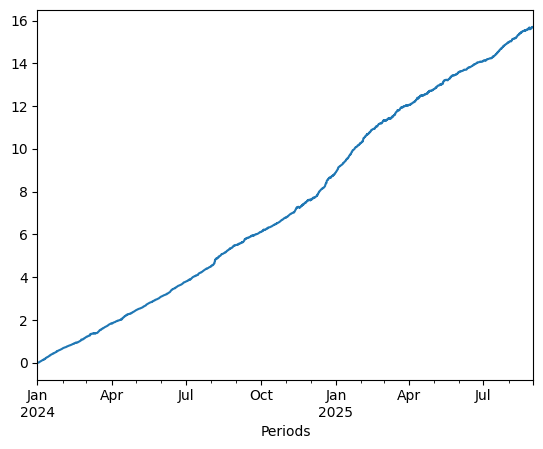

In [12]:
gross_returns.cumsum().plot()

<Axes: xlabel='Periods'>

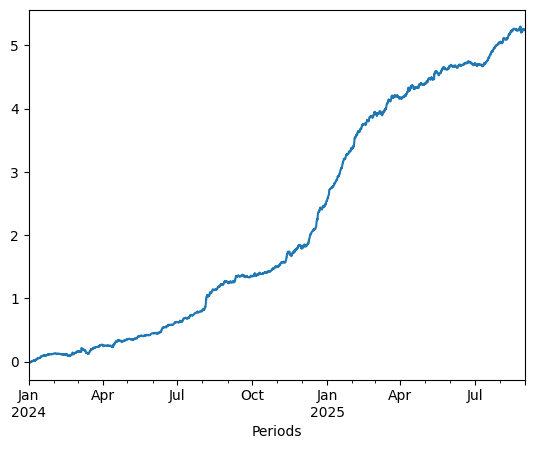

In [13]:
net_returns.cumsum().plot()

In [14]:
from ipynb.fs.full.utility_functions import get_strategy_stats

get_strategy_stats(net_returns, 4, test_px)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


/Users/wchristerson/Documents/wall-street-quants/recompleted-work/class_project/utility_functions.ipynb:30: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  "    asset_returns = px / px.shift() - 1\n",


{'avg returns': 3.1462619322158827,
 'volatility': 0.31836565896402863,
 'sharpe ratio': 9.882541799432492,
 'max drawdown': -1.535772840893848,
 'max drawdown duration': 22.5,
 'alpha_BTC': 0.0014297947102805413,
 'beta_BTC': 0.02626672556997776}